In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
class MLP:
    def __init__(self, n_features, n_neurons, learning_rate, epsilon, n_iter):
        """MLP with a single hidden layer
        problem: binary classification
        """
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.n_samples = None
        self.learning_rate = learning_rate
        self.tolerance = epsilon
        self.n_iter = n_iter
        self.W1 = np.random.randn(n_neurons, n_features)#weights between input and hidden layer
        self.b1 = np.zeros((n_neurons, 1))#biases between input and hidden layer
        self.W2 = np.random.randn(1, n_neurons)#weights between hidden and output layer
        self.b2 = np.zeros((1, 1))#biases between hidden and output layer
        self.H = None#values of hidden layer, shape=(n_neurons, n_samples)
        self.H_activate = None#activated values of hidden layer
        self.Out = None#values of output layer
        self.Out_activate = None#predicted values. shape=(1, n_samples)
        
    relu = lambda self, x: np.maximum(0, x)
    
    sigmoid = lambda self, x: 1 / (1 + np.exp(-x))
    
    relu_derivative = lambda self, x: np.where(x > 0, 1, 0)
    
    sigmoid_derivative = lambda self, x: x * (1 - x)
    
    def forward(self, X):#shape_X = (n_features, n_samples)
        self.H = np.dot(self.W1, X) + self.b1
        self.H_activate = self.relu(self.H)
        self.Out = np.dot(self.W2, self.H_activate) + self.b2
        self.Out_activate = self.sigmoid(self.Out)
        
    def cross_entropy(self, t):#shape_t= (1, n_samples)
        loss = -(np.dot(t, np.log(self.Out_activate).T) + np.dot(1-t, np.log(1-self.Out_activate).T))
        return np.squeeze(loss)
    
    def backward(self, X, y, i):
        #calculate gradients
        self.n_samples = y.shape[1]
        dE_dW2 = np.dot(self.Out_activate - y, self.H_activate.T) / self.n_samples
        dE_db2 = np.mean(self.Out_activate - y)       
        dE_dW1 = np.dot(self.relu_derivative(self.H) * np.dot(self.W2.T, self.Out_activate - y), X.T) / self.n_samples
        dE_db1 = np.mean(self.relu_derivative(self.H) * np.dot(self.W2.T, self.Out_activate - y), axis=1, keepdims=True)
        #update weights and biases
        self.W2 -= self.learning_rate * dE_dW2
        self.b2 -= self.learning_rate * dE_db2
        self.W1 -= self.learning_rate * dE_dW1
        self.b1 -= self.learning_rate * dE_db1
        """if i == 10:
            print('dW1 ',dE_dW1.shape)
            print('dW2 ',dE_dW2.shape)
            print('W1 ',self.W1.shape)
            print('W2 ',self.W2.shape)
            print('H_activate ',self.H_activate.shape)
        """

    def train(self, X, y):
        for iter in range(self.n_iter):
            self.forward(X)
            self.backward(X, y, iter)          
            if self.cross_entropy(y) < self.tolerance:
                break
    
    def predict(self, X):
        self.forward(X)
        return np.round(self.Out_activate)

In [96]:
# evaluate model
def evaluate(model, X, y):
    y_predict = model.predict(X)
    #calculate recall, precision and f1 score
    TP = np.sum(np.logical_and(y_predict == 1, y == 1))
    FP = np.sum(np.logical_and(y_predict == 1, y == 0))
    FN = np.sum(np.logical_and(y_predict == 0, y == 1))
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * precision * recall / (precision + recall)
    print('recall: {:.3f}, precision: {:.3f}, f1_score: {:.3f}'.format(recall, precision, f1_score))

#plot decision boundary
def plot_decision_boundary(model, X, y):
    #set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    #generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    #plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('decision boundary')
    plt.show()

/tmp/ipykernel_1345/3429758992.py:36: RuntimeWarning: divide by zero encountered in log
  loss = -(np.dot(t, np.log(self.Out_activate).T) + np.dot(1-t, np.log(1-self.Out_activate).T))


recall: 0.993, precision: 0.990, f1_score: 0.991


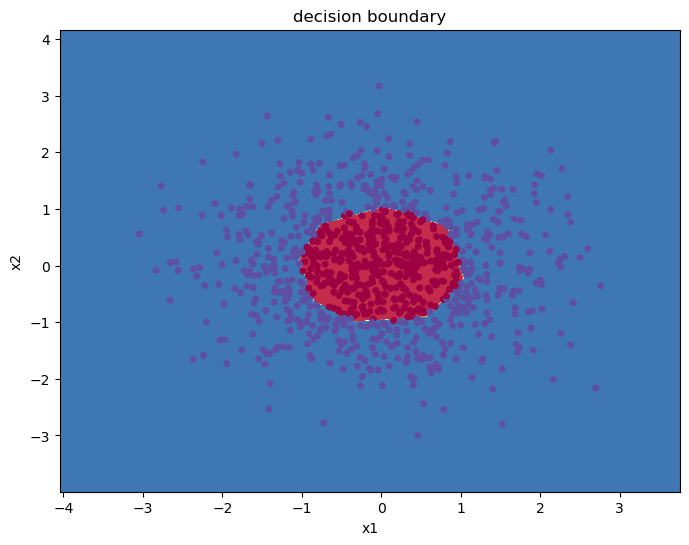

In [97]:
#test 1:
# generate data
np.random.seed(0)
X = np.random.randn(2, 1000)
y = np.array([0 if x[0]**2 + x[1]**2 < 1 else 1 for x in X.T]).reshape(1, -1)
# train model
model = MLP(n_features=2, n_neurons=5, learning_rate=0.12, epsilon=1e-5, n_iter=8000)
model.train(X, y)
# evaluate model
evaluate(model, X, y)
plot_decision_boundary(model, X, y)

recall: 0.997, precision: 1.000, f1_score: 0.999


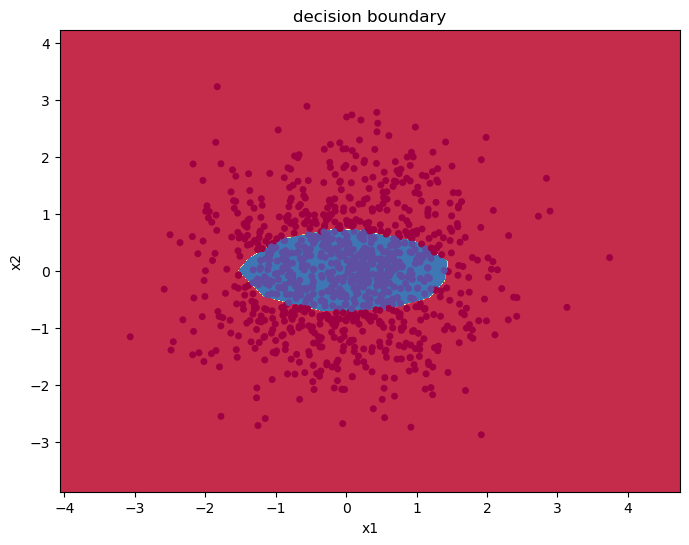

In [98]:
#test2:
np.random.seed(1)
np.random.randn(2, 1000)
X = np.random.randn(2, 1000)
y = np.array([0 if 0.5*x[0]**2 + 2*x[1]**2 > 1 else 1 for x in X.T]).reshape(1, -1)

# train model
model2 = MLP(n_features=2, n_neurons=13, learning_rate=0.12, epsilon=1e-5, n_iter=8000)
model2.train(X, y)

# evaluate model
evaluate(model2, X, y)

# visualize decision boundary
plot_decision_boundary(model2, X, y)